# Covid Data:

- **1 - Yes / 2 - No**
- **sex:** 1 for female and 2 for male.
- **age:** of the patient.
- **classification**: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- **patient type:** type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- **usmr:** Indicates whether the patient treated medical units of the first, second or third level.
- **medical unit:** type of institution of the National Health System that provided the care.
- **icu:** Indicates whether the patient had been admitted to an Intensive Care Unit.
- **date died:** If the patient died indicate the date of death, and 9999-99-99 otherwise.

# Preprocessing:

In [82]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
import pandas as pd

# Loading the Covid Data as df
df = pd.read_csv('Covid Data.csv')

In [83]:
# Chaning DATE_DIED to DIED
df['DIED'] = np.where(df['DATE_DIED'] == '9999-99-99', 2, 1)

In [84]:
# Removing columns
removed_columns = ['MEDICAL_UNIT', 'SEX', 'PREGNANT', 'DIABETES', 'COPD', 'INMSUPR', 'OTHER_DISEASE', 'CLASIFFICATION_FINAL', 'DATE_DIED']
df = df.drop(columns=removed_columns)


In [85]:
df.head(5)

,USMER,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,ASTHMA,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DIED
0,2,1,97,1,65,2,1,2,2,2,2,97,1
1,2,1,97,1,72,2,1,2,1,1,2,97,1
2,2,2,1,2,55,2,2,2,2,2,2,2,1
3,2,1,97,2,53,2,2,2,2,2,2,97,1
4,2,1,97,2,68,2,1,2,2,2,2,97,1


In [86]:
df.tail(5)

,USMER,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,ASTHMA,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DIED
1048570,2,1,97,2,40,2,2,2,2,2,2,97,2
1048571,1,2,2,2,51,2,1,2,2,2,2,2,2
1048572,2,1,97,2,55,2,2,2,2,2,2,97,2
1048573,2,1,97,2,28,2,2,2,2,2,2,97,2
1048574,2,1,97,2,52,2,2,2,2,2,2,97,2


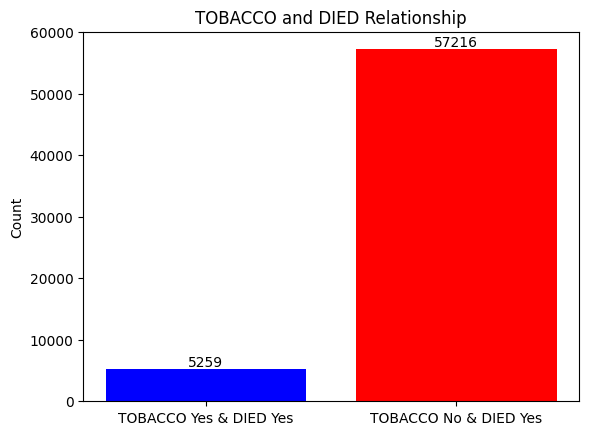

In [108]:
# Count occurrences where TOBACCO is 1 and DIED is 1
count_tobacco_yes_died_yes = df[(df['TOBACCO'] == 1) & (df['DIED'] == 1)].shape[0]

# Count occurrences where TOBACCO is 2 and DIED is 1
count_tobacco_no_died_yes = df[(df['TOBACCO'] == 2) & (df['DIED'] == 1)].shape[0]

# Plotting
labels = ['TOBACCO Yes & DIED Yes', 'TOBACCO No & DIED Yes']
values = [count_tobacco_yes_died_yes, count_tobacco_no_died_yes]

plt.bar(labels, values, color=['blue', 'red'])
plt.title('TOBACCO and DIED Relationship')
plt.ylabel('Count')

# Annotate the bars with the actual count values
for i, value in enumerate(values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

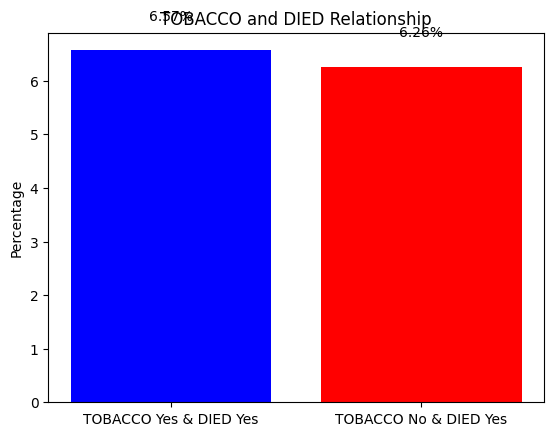

In [111]:
count_tobacco_yes_died_yes = df[(df['TOBACCO'] == 1) & (df['DIED'] == 1)].shape[0]

# Count occurrences where TOBACCO is 2 and DIED is 1
count_tobacco_no_died_yes = df[(df['TOBACCO'] == 2) & (df['DIED'] == 1)].shape[0]

# Total count for each category
total_tobacco_yes = df[df['TOBACCO'] == 1].shape[0]
total_tobacco_no = df[df['TOBACCO'] == 2].shape[0]

# Calculate percentages
percentage_tobacco_yes_died_yes = (count_tobacco_yes_died_yes / total_tobacco_yes) * 100
percentage_tobacco_no_died_yes = (count_tobacco_no_died_yes / total_tobacco_no) * 100

# Plotting
labels = ['TOBACCO Yes & DIED Yes', 'TOBACCO No & DIED Yes']
values = [percentage_tobacco_yes_died_yes, percentage_tobacco_no_died_yes]

plt.bar(labels, values, color=['blue', 'red'])
plt.title('TOBACCO and DIED Relationship')
plt.ylabel('Percentage')

# Annotate the bars with the actual percentage values
for i, value in enumerate(values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

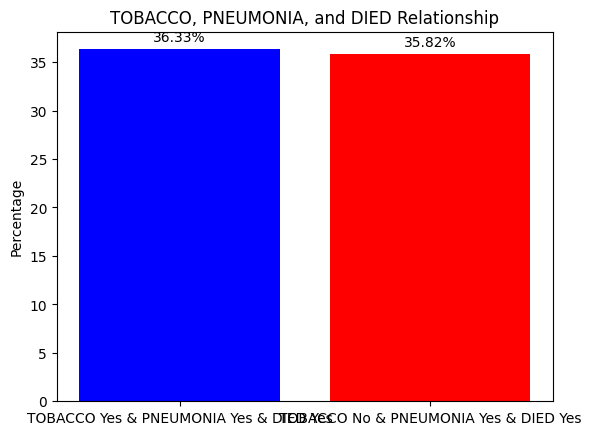

In [109]:
# Count occurrences where TOBACCO is 1, PNEUMONIA is 1, and DIED is 1
count_tobacco_yes_pneumonia_yes_died_yes = df[(df['TOBACCO'] == 1) & (df['PNEUMONIA'] == 1) & (df['DIED'] == 1)].shape[0]

# Count occurrences where TOBACCO is 2, PNEUMONIA is 1, and DIED is 1
count_tobacco_no_pneumonia_yes_died_yes = df[(df['TOBACCO'] == 2) & (df['PNEUMONIA'] == 1) & (df['DIED'] == 1)].shape[0]

# Total count for each category
total_tobacco_yes_pneumonia_yes = df[(df['TOBACCO'] == 1) & (df['PNEUMONIA'] == 1)].shape[0]
total_tobacco_no_pneumonia_yes = df[(df['TOBACCO'] == 2) & (df['PNEUMONIA'] == 1)].shape[0]

# Calculate percentages
percentage_tobacco_yes_pneumonia_yes_died_yes = (count_tobacco_yes_pneumonia_yes_died_yes / total_tobacco_yes_pneumonia_yes) * 100
percentage_tobacco_no_pneumonia_yes_died_yes = (count_tobacco_no_pneumonia_yes_died_yes / total_tobacco_no_pneumonia_yes) * 100

# Plotting
labels = ['TOBACCO Yes & PNEUMONIA Yes & DIED Yes', 'TOBACCO No & PNEUMONIA Yes & DIED Yes']
values = [percentage_tobacco_yes_pneumonia_yes_died_yes, percentage_tobacco_no_pneumonia_yes_died_yes]

plt.bar(labels, values, color=['blue', 'red'])
plt.title('TOBACCO, PNEUMONIA, and DIED Relationship')
plt.ylabel('Percentage')

# Annotate the bars with the actual percentage values
for i, value in enumerate(values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

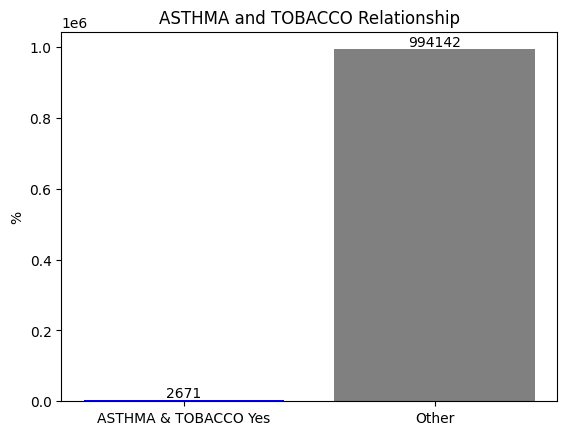

In [102]:
count_asthma_tobacco_yes = df[(df['ASTHMA'] == 1) & (df['TOBACCO'] == 1)].shape[0]

# Plotting
labels = ['ASTHMA & TOBACCO Yes', 'Other']
values = [count_asthma_tobacco_yes, len(df) - count_asthma_tobacco_yes]

plt.bar(labels, values, color=['blue', 'gray'])
plt.title('ASTHMA and TOBACCO Relationship')
plt.ylabel('%')

# Annotate the bars with the actual count values
for i, value in enumerate(values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

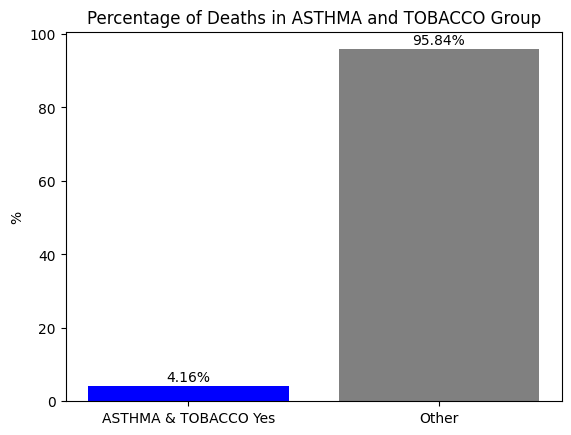

In [114]:
count_asthma_tobacco_yes = df[(df['ASTHMA'] == 1) & (df['TOBACCO'] == 1)].shape[0]

# Count deaths within the group where ASTHMA is 1 and TOBACCO is 1
count_asthma_tobacco_yes_died = df[(df['ASTHMA'] == 1) & (df['TOBACCO'] == 1) & (df['DIED'] == 1)].shape[0]

# Calculate the percentage of deaths within the group
percentage_asthma_tobacco_yes_died = (count_asthma_tobacco_yes_died / count_asthma_tobacco_yes) * 100 if count_asthma_tobacco_yes != 0 else 0

# Plotting
labels = ['ASTHMA & TOBACCO Yes', 'Other']
values = [percentage_asthma_tobacco_yes_died, 100 - percentage_asthma_tobacco_yes_died]

plt.bar(labels, values, color=['blue', 'gray'])
plt.title('Percentage of Deaths in ASTHMA and TOBACCO Group')
plt.ylabel('%')

# Annotate the bars with the actual percentage values
for i, value in enumerate(values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

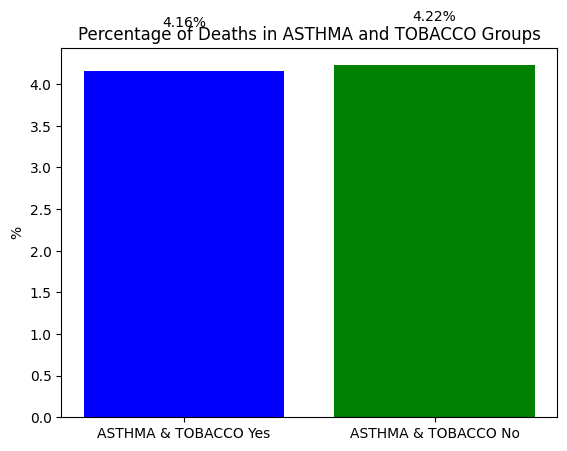

In [117]:
# Count occurrences where ASTHMA is 1 and TOBACCO is 1
count_asthma_tobacco_yes = df[(df['ASTHMA'] == 1) & (df['TOBACCO'] == 1)].shape[0]

# Count deaths within the group where ASTHMA is 1 and TOBACCO is 1
count_asthma_tobacco_yes_died = df[(df['ASTHMA'] == 1) & (df['TOBACCO'] == 1) & (df['DIED'] == 1)].shape[0]

# Count occurrences where ASTHMA is 1 and TOBACCO is 2
count_asthma_tobacco_no = df[(df['ASTHMA'] == 1) & (df['TOBACCO'] == 2)].shape[0]

# Count deaths within the group where ASTHMA is 1 and TOBACCO is 2
count_asthma_tobacco_no_died = df[(df['ASTHMA'] == 1) & (df['TOBACCO'] == 2) & (df['DIED'] == 1)].shape[0]

# Calculate the percentage of deaths within each group
percentage_asthma_tobacco_yes_died = (count_asthma_tobacco_yes_died / count_asthma_tobacco_yes) * 100 if count_asthma_tobacco_yes != 0 else 0
percentage_asthma_tobacco_no_died = (count_asthma_tobacco_no_died / count_asthma_tobacco_no) * 100 if count_asthma_tobacco_no != 0 else 0

# Plotting
labels = ['ASTHMA & TOBACCO Yes', 'ASTHMA & TOBACCO No']
values = [percentage_asthma_tobacco_yes_died, percentage_asthma_tobacco_no_died]

plt.bar(labels, values, color=['blue', 'green'])
plt.title('Percentage of Deaths in ASTHMA and TOBACCO Groups')
plt.ylabel('%')

# Annotate the bars with the actual percentage values
for i, value in enumerate(values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

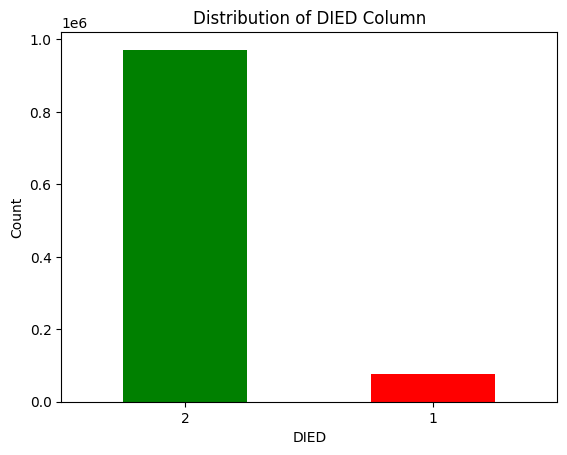

In [87]:
df['DIED'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of DIED Column')
plt.xlabel('DIED')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [88]:
df.PNEUMONIA.value_counts() 

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

<Axes: xlabel='PNEUMONIA'>

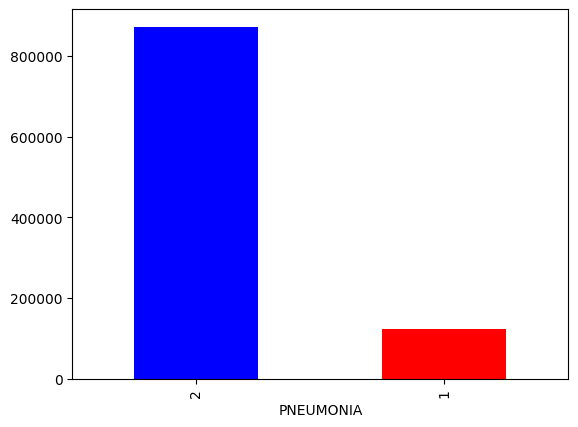

In [95]:
df = df[df['PNEUMONIA'].isin([1, 2])]

df.PNEUMONIA.value_counts().plot(kind="bar", color=['blue', 'red'])

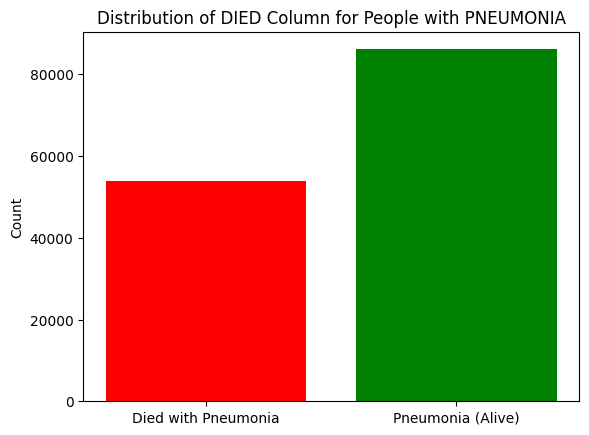

In [90]:
import matplotlib.pyplot as plt

df_dead_pneumonia = df[(df['DIED'] == 1) & (df['PNEUMONIA'] == 1)]
df_pneumonia_not_dead = df[(df['DIED'] == 2) & (df['PNEUMONIA'] == 1)]

count_dead_pneumonia = len(df_dead_pneumonia)
count_pneumonia_not_dead = len(df_pneumonia_not_dead)

plt.bar(['Died with Pneumonia', 'Pneumonia (Alive)'], [count_dead_pneumonia, count_pneumonia_not_dead], color=['red', 'green'])
plt.title('Distribution of DIED Column for People with PNEUMONIA')
plt.ylabel('Count')
plt.show()


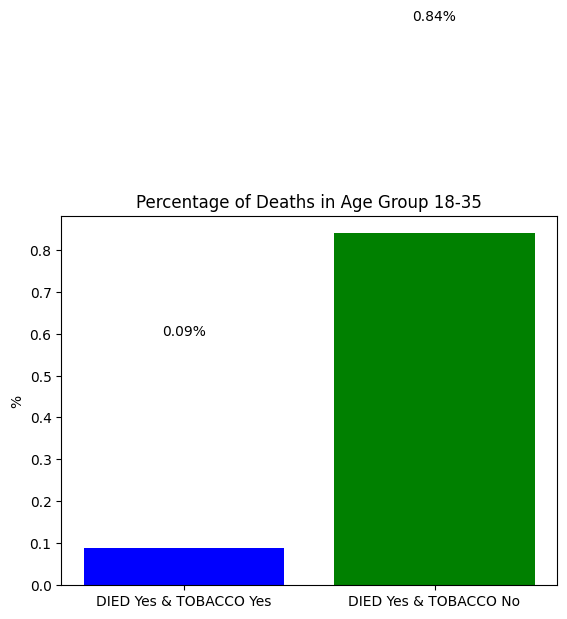

In [119]:
df_age_18_35 = df[(df['AGE'] >= 18) & (df['AGE'] <= 35)]

# Count occurrences where DIED is 'Yes' and TOBACCO is 'Yes'
count_died_tobacco_yes = df_age_18_35[(df_age_18_35['DIED'] == 1) & (df_age_18_35['TOBACCO'] == 1)].shape[0]

# Count occurrences where DIED is 'Yes' and TOBACCO is 'No'
count_died_tobacco_no = df_age_18_35[(df_age_18_35['DIED'] == 1) & (df_age_18_35['TOBACCO'] == 2)].shape[0]

# Calculate the total count of individuals aged between 18 and 35
total_age_18_35 = df_age_18_35.shape[0]

# Calculate the percentage of deaths within each group
percentage_died_tobacco_yes = (count_died_tobacco_yes / total_age_18_35) * 100 if total_age_18_35 != 0 else 0
percentage_died_tobacco_no = (count_died_tobacco_no / total_age_18_35) * 100 if total_age_18_35 != 0 else 0

# Plotting
labels = ['DIED Yes & TOBACCO Yes', 'DIED Yes & TOBACCO No']
values = [percentage_died_tobacco_yes, percentage_died_tobacco_no]

plt.bar(labels, values, color=['blue', 'green'])
plt.title('Percentage of Deaths in Age Group 18-35')
plt.ylabel('%')

# Annotate the bars with the actual percentage values
for i, value in enumerate(values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

# Descriptive analytics:

In [91]:
threshold_age = 75
df = df[df['AGE'] <= threshold_age]

<Axes: xlabel='AGE', ylabel='Count'>

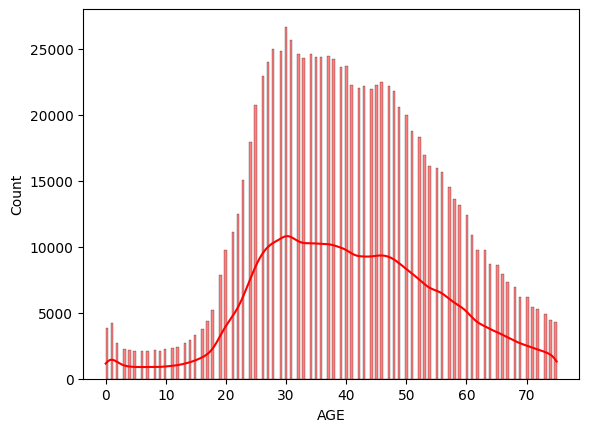

In [92]:
sns.histplot(data=df, x=df["AGE"], kde=True, color="red")

40.49136096740311
40.0
30


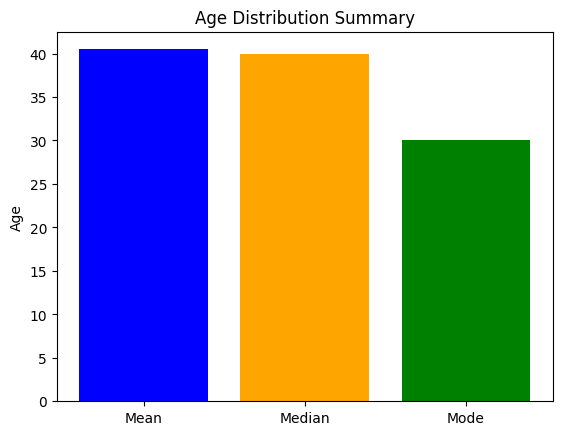

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

meanAge = df['AGE'].mean()
medianAge = df['AGE'].median()
modeAge = stats.mode(df['AGE']).mode
print(meanAge)
print(medianAge)
print(modeAge)
plt.bar(['Mean', 'Median', 'Mode'], [meanAge, medianAge, modeAge], color=['blue', 'orange', 'green'])
plt.title('Age Distribution Summary')
plt.ylabel('Age')
plt.show()


Sve vrednosti su izmedju 30 i 40

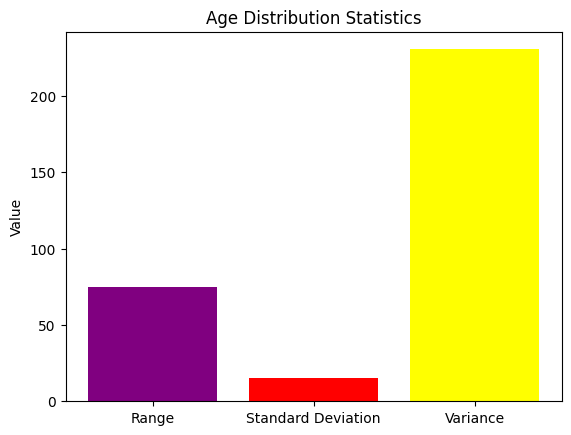

In [94]:
age_data = df['AGE']

age_range = age_data.max() - age_data.min()
std_dev_age = age_data.std()
variance_age = age_data.var()

plt.bar(['Range', 'Standard Deviation', 'Variance'], [age_range, std_dev_age, variance_age], color=['purple', 'red', 'yellow'])
plt.title('Age Distribution Statistics')
plt.ylabel('Value')
plt.show()